In [1]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
#assigning class names
class_names = ['Amaranthus Viridis (Arive-Dantu)', 'Basella Alba (Basale)', 'Carissa Carandas (Karanda)', 'Jasminum (Jasmine)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Punica Granatum (Pomegranate)']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [5]:
#loading data
def load_data():
    """
        Load the data:
            -  images to train the network.
            -  images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['C:\\Users\\91777\\Documents\\Shashwat\\P12herbs\\nnytj2v3n5-1 (1)\\train', 'C:\\Users\\91777\\Documents\\Shashwat\\P12herbs\\nnytj2v3n5-1 (1)\\test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\91777\Documents\Shashwat\P12herbs\nnytj2v3n5-1 (1)\train


100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:02<00:00, 29.98it/s]


Loading C:\Users\91777\Documents\Shashwat\P12herbs\nnytj2v3n5-1 (1)\test


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.30it/s]


In [7]:
test_images.shape

(623, 150, 150, 3)

In [5]:
#test_images

In [8]:
#dividing the data into testing and training 
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [9]:

n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 490
Number of testing examples: 623
Each image is of size: (150, 150)


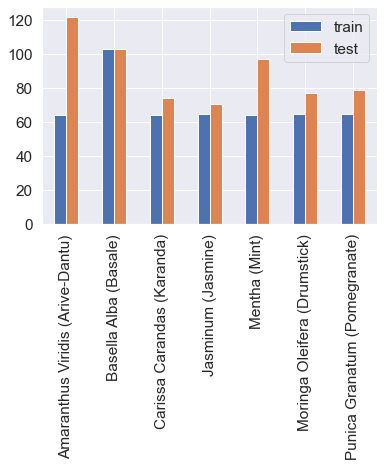

In [10]:
#visualizing the training and testing split
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

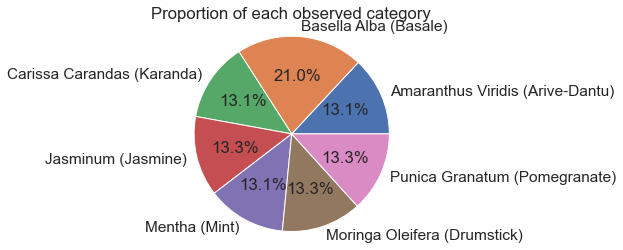

In [11]:
#data distribution
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [12]:
#scaling down the pixel values in the range 0 to 255 down to 0 to 1 
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [13]:
test_images.shape

(623, 150, 150, 3)

In [14]:
test_images[0].shape

(150, 150, 3)

In [15]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

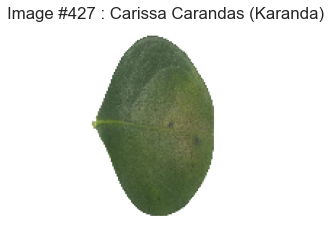

In [16]:
display_random_image(class_names, train_images, train_labels)

In [17]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [18]:
#display_examples(class_names, train_images, train_labels)

In [19]:
#defining the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

In [20]:
#comiling the neural network model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
4/4 [==============================] - 4s 1s/step - loss: 3.2547 - accuracy: 0.1403 - val_loss: 2.6198 - val_accuracy: 0.1531
Epoch 2/20
4/4 [==============================] - 4s 913ms/step - loss: 2.3284 - accuracy: 0.1556 - val_loss: 1.8539 - val_accuracy: 0.1224
Epoch 3/20
4/4 [==============================] - 4s 882ms/step - loss: 1.7293 - accuracy: 0.3699 - val_loss: 1.5407 - val_accuracy: 0.3265
Epoch 4/20
4/4 [==============================] - 4s 914ms/step - loss: 1.4151 - accuracy: 0.5561 - val_loss: 1.2799 - val_accuracy: 0.5510
Epoch 5/20
4/4 [==============================] - 4s 893ms/step - loss: 1.0280 - accuracy: 0.6735 - val_loss: 0.9285 - val_accuracy: 0.7143
Epoch 6/20
4/4 [==============================] - 4s 939ms/step - loss: 0.6566 - accuracy: 0.8342 - val_loss: 0.7340 - val_accuracy: 0.7449
Epoch 7/20
4/4 [==============================] - 4s 944ms/step - loss: 0.4450 - accuracy: 0.8571 - val_loss: 0.5122 - val_accuracy: 0.8265
Epoch 8/20
4/4 [=======

In [22]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

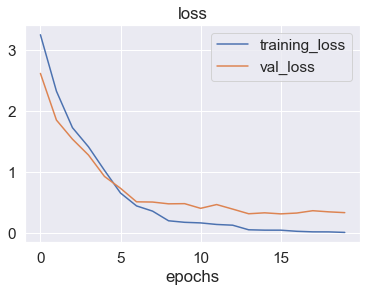

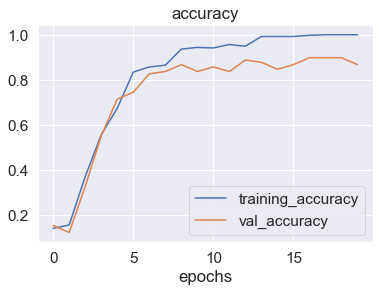

In [23]:
plot_loss_curves(history)

In [185]:
train_images.shape

(452, 150, 150, 3)

In [186]:
test_images.shape

(172, 150, 150, 3)

In [1]:
#test_images

In [2]:
#test_images[0]

In [189]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
predictions.shape
#pred_labels
#display_random_image(class_names, test_images, pred_labels)

(172, 7)

In [51]:
#import pickle
#leafmodel = 'finalized_leafmodel.sav'
#pickle.dump(model, open(leafmodel, 'wb'))

In [88]:
model.save("model.h5")

In [1]:

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt 
import numpy as np

 
# load model
leafmodel = load_model('model.h5')
leafmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_5 (Dense)              (None, 7)                

In [8]:

#https://machinelearningmastery.com/save-load-keras-deep-learning-models/
img = ('C:\\Users\\91777\\Documents\\Shashwat\\P12herbs\\nnytj2v3n5-1 (1)\\train\\Jasminum (Jasmine)\\J-S-057.jpg')
IMAGE_SIZE = (150, 150)
image = cv2.imread(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE) 
#image.shape
image = image / 255.0
image = image.reshape(-1,150,150,3)
predictions1 = leafmodel.predict(image)     # Vector of probabilities
pred_labels1 = np.argmax(predictions1, axis = 1) # We take the highest probability
result = pred_labels1[0]
result
if result == 0:
    print("Arive-Dantu")
elif result == 1:
    print("Basale")
elif result == 2:
    print("Karanda")
elif result == 3:
    print("Jasmine")
elif result == 4:
    print("Mint")
elif result == 5:
    print("Drumstick")
else:
    print("Pomegranate")    

Jasmine


In [ ]:


#1
#class_names = ['Amaranthus Viridis (Arive-Dantu)', 'Basella Alba (Basale)', 'Carissa Carandas (Karanda)', 'Jasminum (Jasmine)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Punica Granatum (Pomegranate)']

In [149]:
IMAGE_SIZE = (150, 150)

In [150]:
image = cv2.imread(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE) 
image.shape

(150, 150, 3)

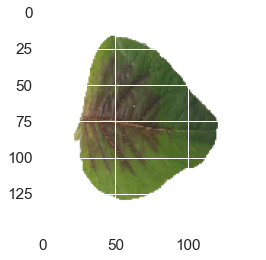

In [152]:
image = image / 255.0
plt.imshow(image)

In [153]:
image.shape

(150, 150, 3)

In [170]:
image = image.reshape(-1,150,150,3)

In [171]:
image.shape

(1, 150, 150, 3)

In [174]:
predictions1 = leafmodel.predict(image)     # Vector of probabilities
pred_labels1 = np.argmax(predictions1, axis = 1) # We take the highest probability
pred_labels1

array([0], dtype=int64)

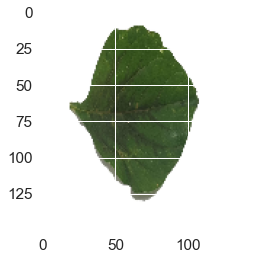

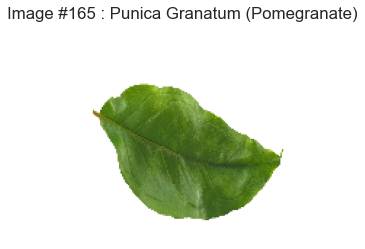

In [51]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)